In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.model_selection import cross_val_score


In [ ]:
df = pd.read_csv("InstagramData.csv", encoding = 'latin1')
print(df.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [52]:
df

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


In [ ]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_7872\3349444010.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["From Home"])


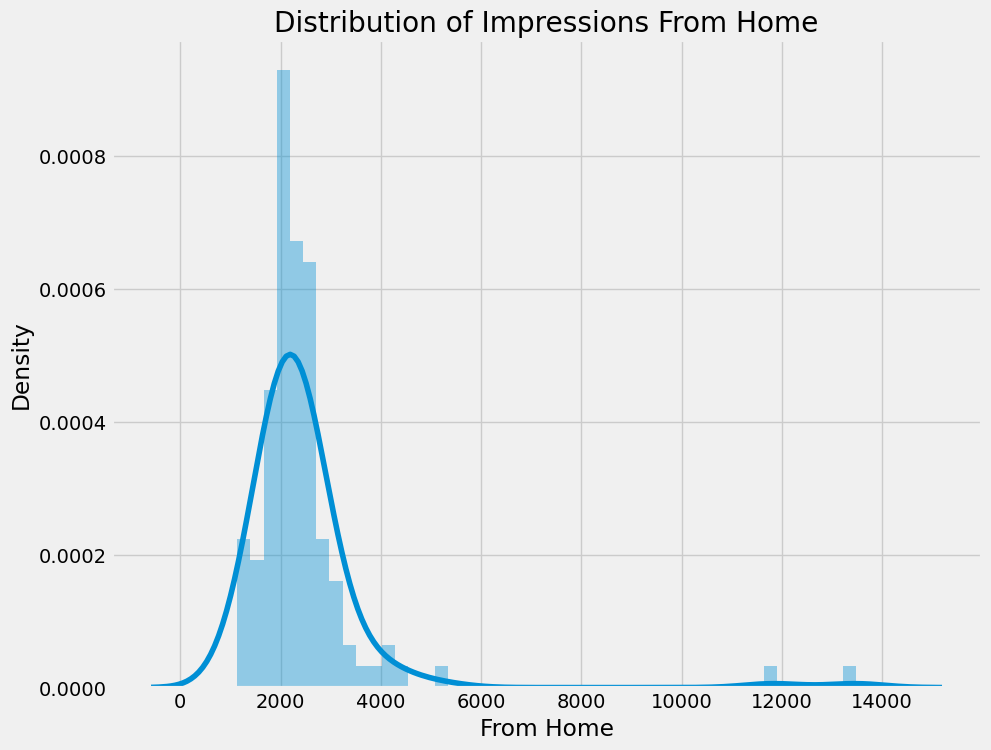

In [ ]:
plt.figure(figsize = (10, 8))
plt.style.use("fivethirtyeight")
plt.title("Distribution of Impressions From Home")
sns.distplot(df["From Home"])
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7872\81263985.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["From Hashtags"])


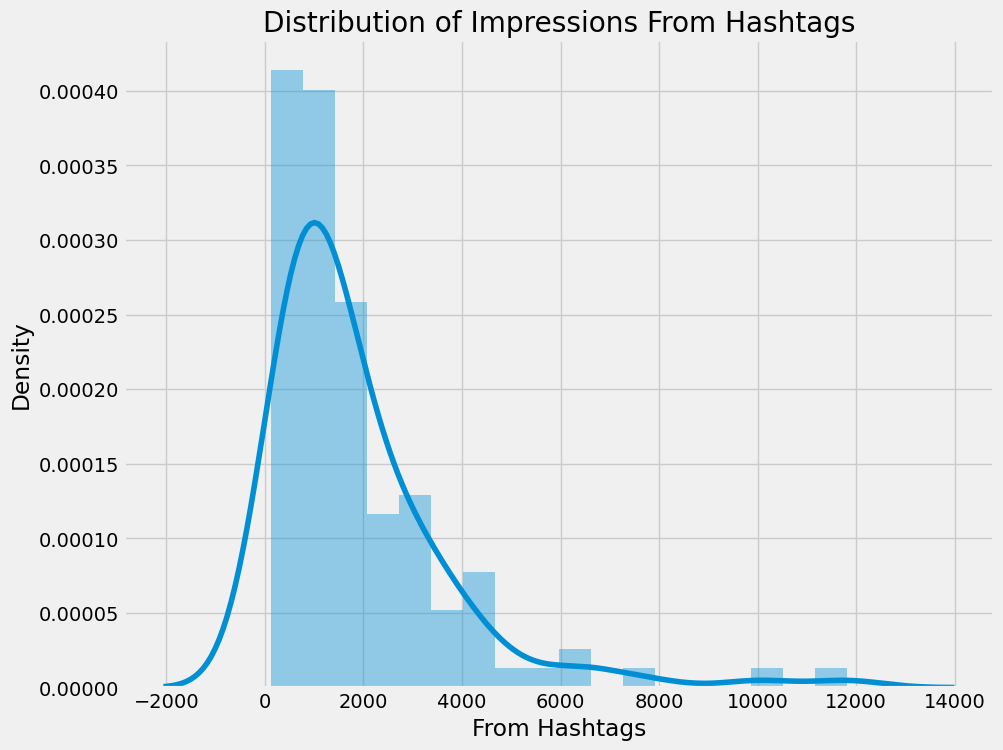

In [18]:
plt.figure(figsize = (10, 8))
plt.style.use("fivethirtyeight")
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(df["From Hashtags"])
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7872\809455062.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["From Explore"])


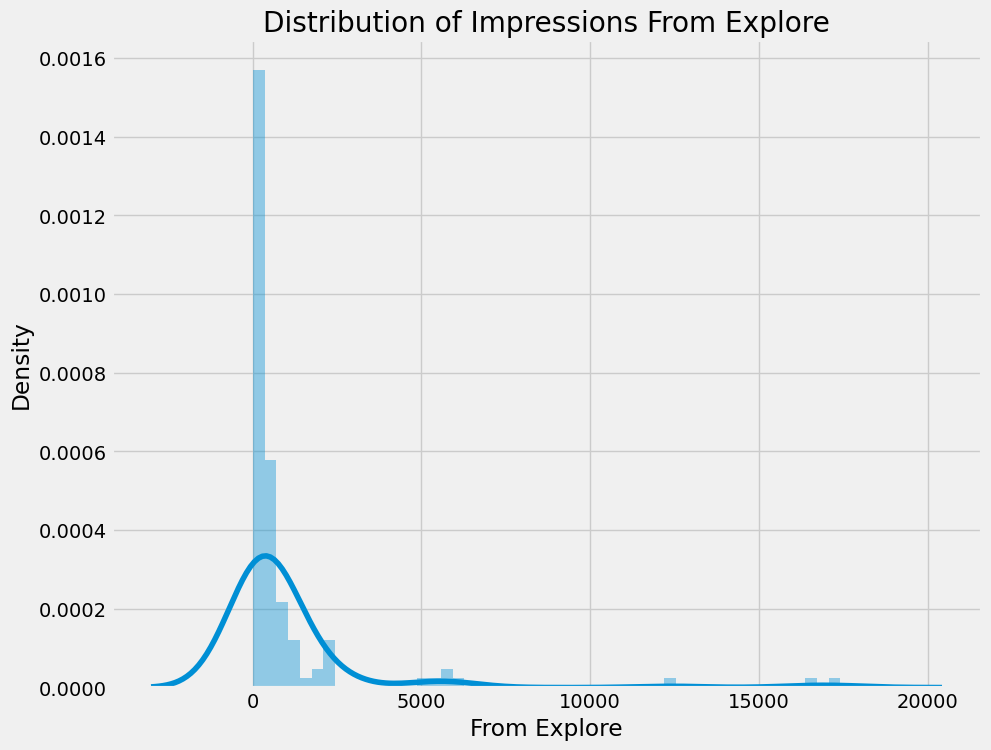

In [22]:
plt.figure(figsize= (10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(df["From Explore"])
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7872\3225056383.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["From Other"])


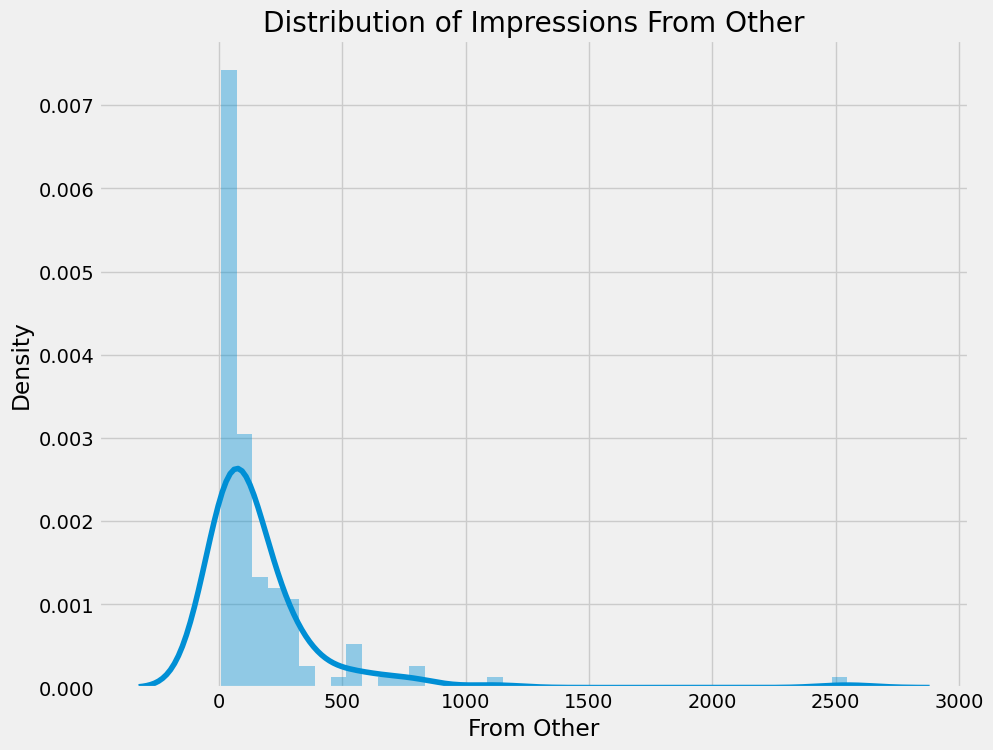

In [23]:
plt.figure(figsize= (10, 8))
plt.title("Distribution of Impressions From Other")
sns.distplot(df["From Other"])
plt.show()

In [24]:
home = df["From Home"].sum()
hashtags = df["From Hashtags"].sum()
explore = df["From Explore"].sum()
others = df["From Other"].sum()

labels = ["From Home", "From Hashtags", "From Explore", "From Others"]
values = [home, hashtags, explore, others]

fig = px.pie(df, values= values, names= labels, title= "Impressions From Instagram Posts")
fig.show()

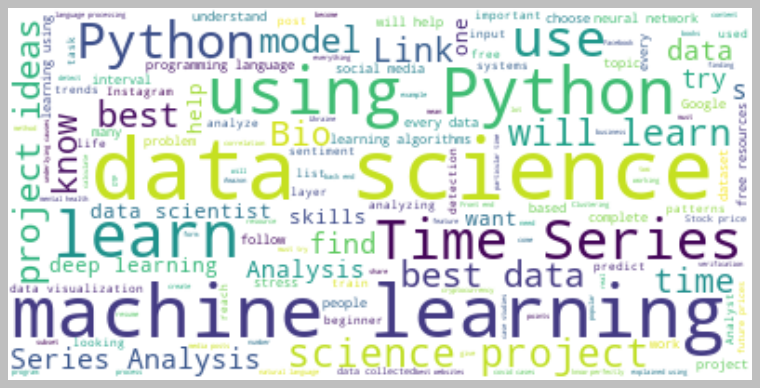

In [30]:
# Combine all captions from the 'Caption' column into a single string for text analysis or visualization
text = " ".join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color= "white").generate(text)
plt.style.use("classic")
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

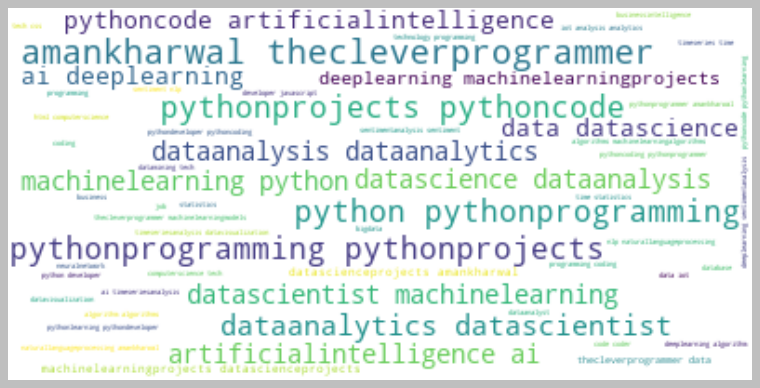

In [29]:
text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color= "white").generate(text)
plt.style.use("classic")
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
figure = px.scatter(data_frame= df, x= "Impressions", y = "Likes", size= "Likes",
                    trendline= "ols", 
                    title= "Relationship Between Likes and Impressions")
figure.show()
# This code creates a scatter plot using Plotly Express to visualize the relationship between 'Impressions' and 'Likes' in the dataset.
# The size of each point represents the number of 'Likes', and a trendline (ordinary least squares regression) is added to show the correlation.

In [35]:
figure_two = px.scatter(data_frame= df, x= "Impressions", y = "Comments", size= "Comments",
                    trendline= "ols", 
                    title= "Relationship Between Likes and Comments")
figure_two.show()

In [34]:
figure_three = px.scatter(data_frame= df, x= "Impressions", y = "Shares", size= "Shares",
                    trendline= "ols", 
                    title= "Relationship Between Likes and Shares")
figure_three.show()

In [36]:
figure_four = px.scatter(data_frame= df, x= "Impressions", y = "Saves", size= "Saves",
                    trendline= "ols", 
                    title= "Relationship Between Likes and Saves")
figure_four.show()

In [51]:

df_2 = df.copy()
columns = ['Caption', 'Hashtags']
df_2 = df_2.drop(columns, axis=1)
correlation = df_2.corr()
corre = correlation["Impressions"].sort_values(ascending= False)
print(corre)


Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [55]:
def conversion_rate():
    """in instagram conversion Rate means how mnay followers you get
        from the number of profile visits from a post
    """
    conversion_rate= (df["Follows"].sum() / df["Profile Visits"].sum()) *100
    print(conversion_rate)

In [56]:
conversion_rate()

41.00265604249668


In [57]:
figure_four = px.scatter(data_frame= df, x= "Profile Visits", y = "Follows", 
                         size= "Follows",
                    trendline= "ols", 
                    title= "Relationship Between Profile Visits and Follows")
figure_four.show()

In [58]:
y = df["Impressions"]
y

0       3920
1       5394
2       4021
3       4528
4       2518
       ...  
114    13700
115     5731
116     4139
117    32695
118    36919
Name: Impressions, Length: 119, dtype: int64

In [60]:
to_be_dropped = ["From Home", "From Hashtags", "From Other", 
                 "From Explore", "Caption", "Hashtags", "Impressions"]
x = df.drop(to_be_dropped, axis= 1)
x

,Saves,Comments,Shares,Likes,Profile Visits,Follows
0,98,9,5,162,35,2
1,194,7,14,224,48,10
2,41,11,1,131,62,12
3,172,10,7,213,23,8
4,96,5,4,123,8,0
...,...,...,...,...,...,...
114,573,2,38,373,73,80
115,135,4,1,148,20,18
116,36,0,1,92,34,10
117,1095,2,75,549,148,214


In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, 
                                                    random_state= 42)

In [130]:
model = PassiveAggressiveRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9083783062530506

In [144]:
scores = cross_val_score(model, x, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean:", scores.mean())

Cross-validated R² scores: [0.42885639 0.82489966 0.65430944 0.89070059 0.82701544]
Mean: 0.7251563035018304


In [156]:
#To predict
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = pd.DataFrame([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
print(f"{int(model.predict(features))} Impressions will be made ")

6229 Impressions will be made 


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but PassiveAggressiveRegressor was fitted with feature names

C:\Users\HP\AppData\Local\Temp\ipykernel_7872\4081165862.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

